In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurements = base.classes.measurement
stations = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#Query the latest date in the dataset.

recent_date = session.query(measurements.date).order_by(measurements.date.desc()).first()[0]
recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d')
recent_date

datetime.datetime(2017, 8, 23, 0, 0)

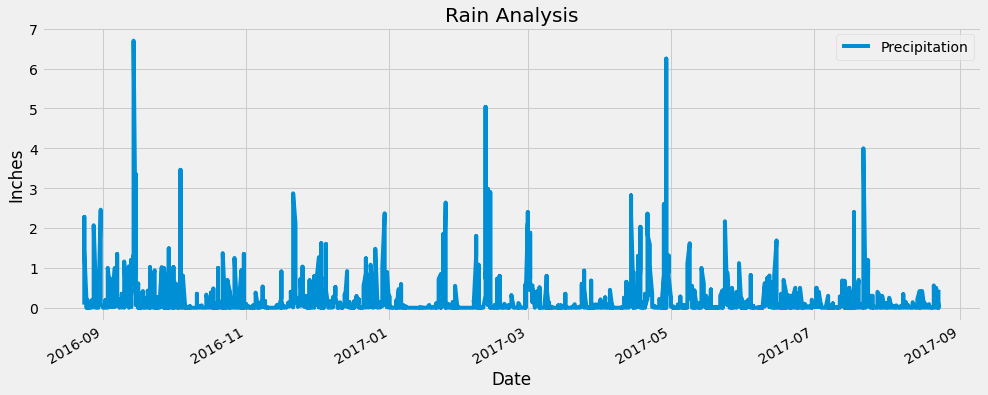

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
first_date = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
twelve_month_prec = session.query(measurements.date, measurements.prcp).\
filter(measurements.date >= first_date).order_by(measurements.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
Prec_df = pd.DataFrame(twelve_month_prec, columns = ["Date", "Precipitation"])
Prec_df.set_index("Date", inplace=True)

# Sort the dataframe by date
Prec_df = Prec_df.sort_values('Date')

#Dropping NaN values from dataframe before plotting
Prec_df = Prec_df.dropna()

#use datetime function to format the dates to correctly display on MatPlotLib chart. 
Prec_df.index = pd.to_datetime(Prec_df.index, format="%Y/%m/%d")

# Use Pandas Plotting with Matplotlib to plot the data

Prec_df.plot(figsize = (15,6))
plt.title("Rain Analysis")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prec_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(func.count(func.distinct(measurements.station))).first()[0]
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurements.station, func.count(measurements.id))\
    .group_by(measurements.station)\
    .order_by(func.count(measurements.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
#to avoid copy and pasting station date, assign it to a variable and pull only the station number uising the .first()[0] function.

most_active = session.query(measurements.station, func.count(measurements.id))\
    .group_by(measurements.station)\
    .order_by(func.count(measurements.id).desc()).first()[0]
most_active
   

'USC00519281'

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_stations = session.query(measurements.station, func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs))\
    .filter(measurements.station == most_active)\
    .order_by(func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs).desc()).all()
active_stations


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Days')

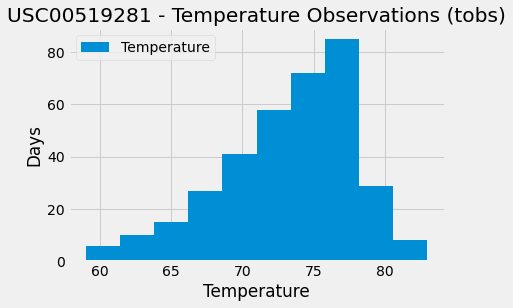

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_results = session.query(measurements.station, measurements.tobs).\
                filter(measurements.station == most_active).\
                filter(measurements.date >= first_date).all()

#Create Database to support creating the chart:                
USC00519281_results_df = pd.DataFrame(USC00519281_results, columns = ["Station", "Temperature"])
USC00519281_results_df.plot.hist()
#use f-string to pull the most active statation. Allowing it to update with the datasource. 
plt.title(f"{most_active} - Temperature Observations (tobs)")
plt.xlabel("Temperature")
plt.ylabel("Days")

# Close session

In [ ]:
# Close Session
session.close()